In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import linear_model

import math
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std

from sklearn import neighbors
from sklearn.model_selection import cross_val_score

%matplotlib inline

# prepare data for multivariate regression

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/New_York_offenses/NEW_YORK-Offenses_Known_to_Law_Enforcement_by_City_2013%20-%2013tbl8ny.csv')

In [3]:
data.head()

,Table 8,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,NEW YORK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Offenses Known to Law Enforcement,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"by City, 2013",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,City,Population,Violent\ncrime,Murder and\nnonnegligent\nmanslaughter,Rape\n(revised\ndefinition)1,Rape\n(legacy\ndefinition)2,Robbery,Aggravated\nassault,Property\ncrime,Burglary,Larceny-\ntheft,Motor\nvehicle\ntheft,Arson3
4,Adams Village,"1,861",0,0,NaN,0,0,0,12,2,10,0,0


In [4]:
# drop top 3 rows and bottom 3 rows
data.drop([0, 1, 2, 352, 353, 354], axis=0, inplace=True )

In [5]:
data.columns = data.loc[3,:]

In [6]:
data.drop([3], axis=0, inplace=True)

In [7]:
data.set_index('City', inplace=True)

In [8]:
data.head()

3,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
City,,,,,,,,,,,,
Adams Village,"1,861",0,0,NaN,0,0,0,12,2,10,0,0
Addison Town and Village,"2,577",3,0,NaN,0,0,3,24,3,20,1,0
Akron Village,"2,846",3,0,NaN,0,0,3,16,1,15,0,0
Albany,"97,956",791,8,NaN,30,227,526,"4,090",705,"3,243",142,NaN
Albion Village,"6,388",23,0,NaN,3,4,16,223,53,165,5,NaN


In [9]:
data.columns

Index(['Population', 'Violent\ncrime',
       'Murder and\nnonnegligent\nmanslaughter',
       'Rape\n(revised\ndefinition)1', 'Rape\n(legacy\ndefinition)2',
       'Robbery', 'Aggravated\nassault', 'Property\ncrime', 'Burglary',
       'Larceny-\ntheft', 'Motor\nvehicle\ntheft', 'Arson3'],
      dtype='object', name=3)

In [10]:
data_reg = data[['Population', 'Murder and\nnonnegligent\nmanslaughter','Aggravated\nassault','Robbery','Property\ncrime','Burglary','Larceny-\ntheft','Motor\nvehicle\ntheft']]

In [11]:
data_reg['Murder'] = data_reg['Murder and\nnonnegligent\nmanslaughter']
data_reg['Larceny'] = data_reg['Larceny-\ntheft']
data_reg['Auto'] = data_reg['Motor\nvehicle\ntheft']
data_reg['Property'] = data_reg['Property\ncrime']
data_reg['Assault'] = data_reg['Aggravated\nassault']

/anaconda/envs/3point6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda/envs/3point6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda/envs/3point6/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

In [12]:
data_reg.drop(['Murder and\nnonnegligent\nmanslaughter','Aggravated\nassault','Property\ncrime','Larceny-\ntheft','Motor\nvehicle\ntheft'], axis=1, inplace=True)

In [13]:
data_reg.head()

3,Population,Robbery,Burglary,Murder,Larceny,Auto,Property,Assault
City,,,,,,,,
Adams Village,"1,861",0,2,0,10,0,12,0
Addison Town and Village,"2,577",0,3,0,20,1,24,3
Akron Village,"2,846",0,1,0,15,0,16,3
Albany,"97,956",227,705,8,"3,243",142,"4,090",526
Albion Village,"6,388",4,53,0,165,5,223,16


In [14]:
data_reg2 = (data_reg.applymap(lambda s: s.replace(',',''))).copy().astype(int)

In [15]:
data_reg2['Murder_b'] = data_reg2['Murder'].apply(lambda x: 1 if x>0 else 0)

In [16]:
data_reg2['Robbery_b'] = data_reg2['Robbery'].apply(lambda x: 1 if x>0 else 0)

In [17]:
data_reg2['Population2'] = data_reg2['Population'].pow(2)

(array([   0.,   50.,  100.,  150.,  200.,  250.,  300.,  350.]),
 <a list of 8 Text xticklabel objects>)

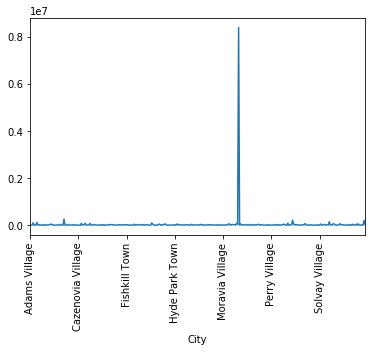

In [18]:
data_reg2['Population'].plot()
plt.xticks(rotation=90)

In [19]:
idx = np.where(data_reg2['Population']>0.5*1e7)

In [20]:
# outliers
data_reg2.iloc[list(idx[0]),:]

3,Population,Robbery,Burglary,Murder,Larceny,Auto,Property,Assault,Murder_b,Robbery_b,Population2
City,,,,,,,,,,,
New York,8396126,19170,16606,335,117931,7434,141971,31767,1,1,70494931807876


In [21]:
# remove outliers
data_reg2.drop(['New York'], axis=0, inplace=True)

(array([   0.,   50.,  100.,  150.,  200.,  250.,  300.,  350.]),
 <a list of 8 Text xticklabel objects>)

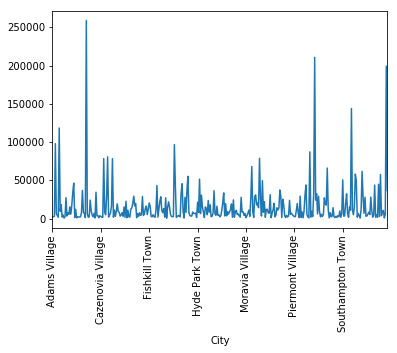

In [22]:
data_reg2['Population'].plot()
plt.xticks(rotation=90)

In [23]:
data_reg2.head()

3,Population,Robbery,Burglary,Murder,Larceny,Auto,Property,Assault,Murder_b,Robbery_b,Population2
City,,,,,,,,,,,
Adams Village,1861,0,2,0,10,0,12,0,0,0,3463321
Addison Town and Village,2577,0,3,0,20,1,24,3,0,0,6640929
Akron Village,2846,0,1,0,15,0,16,3,0,0,8099716
Albany,97956,227,705,8,3243,142,4090,526,1,1,9595377936
Albion Village,6388,4,53,0,165,5,223,16,0,1,40806544


In [24]:
# we want a variable to predict which is not mostly 0 or 1.
data_reg2['Robbery_b'].sum()/data_reg2.shape[0]

0.59942363112391928

# Setting up logistic regressions

In [ ]:
# I am going to try to predict the probability of murder.

In [26]:
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression

I need to standardize the features because otherwise the regularizations just don't make sense 
(you would put a beta with higher units under the same pressure as a beta with lower units...bad idea)

In [27]:
normalizeVars = ['Population','Murder', 'Assault','Burglary','Larceny','Auto','Property']
data_reg3 = pd.DataFrame(preprocessing.scale(data_reg2.loc[:,normalizeVars]), index=data_reg2.index, columns=normalizeVars)

In [28]:
data_reg3['Robbery_b'] = data_reg2['Robbery_b']

In [29]:
#divide data in training and test
# generate random indices (since the data is ordered alphabetically and you want a good train/test breakdown)
np.random.seed(seed=456613)

trainIdx = []
while len(trainIdx) < int(data_reg2.shape[0]/2):
    newIdx = int(np.random.randint(0,data_reg2.shape[0]-1,1))
    if newIdx not in trainIdx:
        trainIdx.append(newIdx)
testIdx = [ii for ii in range(0, data_reg2.shape[0]) if ii not in trainIdx]

In [30]:
data_train = data_reg3.iloc[trainIdx,:]
data_test = data_reg3.iloc[sorted(testIdx),:]

In [31]:
data_train.head()

,Population,Murder,Assault,Burglary,Larceny,Auto,Property,Robbery_b
City,,,,,,,,
Franklinville Village,-0.527148,-0.163487,-0.233779,-0.272804,-0.373836,-0.215804,-0.342492,1
Tonawanda Town,1.557821,0.106656,0.434974,0.445371,0.816305,0.183695,0.690544,1
East Hampton Town,0.137469,-0.163487,-0.101583,-0.061132,-0.086802,-0.112230,-0.083023,1
Seneca Falls Town,-0.502740,-0.163487,-0.148241,-0.087591,-0.085402,-0.141822,-0.090768,1
Ramapo Town,2.634772,0.376799,0.085045,0.059824,0.233836,-0.023452,0.175479,1


In [32]:
predictVar = 'Robbery_b'
# Robbery is under the category of VIOLENT CRIME and it is different from Property Crime (Burglary, Larceny, Auto)

In [33]:
Y_train = data_train[predictVar].values.reshape(-1,)
X_train = data_train.loc[:,~(data_train.columns).isin([predictVar])]

In [34]:
Y_test = data_test[predictVar].values.reshape(-1,)
X_test = data_test.loc[:,~(data_test.columns).isin([predictVar])]

In [35]:
np.sum(Y_test)/len(Y_test)

0.57471264367816088

# Vanilla Logistic Regression

In [36]:
regrLogVanilla = LogisticRegression(penalty='l2',C=1e9)

In [37]:
regrLogVanilla.fit(X_train, Y_train)

# Display the R2
print('VANILLA\n')
print('Train R2: {} \n'.format(regrLogVanilla.score(X_train, Y_train)))
print('Test R2: {} \n'.format(regrLogVanilla.score(X_test, Y_test)))

VANILLA

Train R2: 0.838150289017341 

Test R2: 0.8563218390804598 



In [38]:
for ii in range(0, len(X_train.columns)):
    print('Coefficient for {}'.format(X_train.columns[ii]))
    print(regrLogVanilla.coef_[0,ii])

Coefficient for Population
-3.51467511215
Coefficient for Murder
30.3008371551
Coefficient for Assault
-6.64506482183
Coefficient for Burglary
2.6651571729
Coefficient for Larceny
15.40852549
Coefficient for Auto
16.6158019617
Coefficient for Property
12.4243661762


For ordinary Logistic regression the R2 is around 83-85% and all coefficients are non-zero. 

# Ridge Logistic Regression

In [39]:
smallC = np.arange(0.01,1,0.02).reshape(-1,1)
bigC = np.arange(1,100,10).reshape(-1,1)
cVec = np.vstack((smallC, bigC))
estimatesRidge = np.nan*np.zeros(shape=[len(cVec),len(list(X_train.columns))+3])
estimatesLasso = np.nan*np.zeros(shape=[len(cVec),len(list(X_train.columns))+3])

In [40]:
for ii in range(0,len(cVec)):
    cc = cVec[ii][0]
    
    ridge = LogisticRegression(penalty='l2', C=cc, fit_intercept=True)
    ridge.fit(X_train, Y_train)
    estimatesRidge[ii, :-3] = ridge.coef_
    estimatesRidge[ii, -3] = cc
    estimatesRidge[ii, -2] = ridge.score(X_train, Y_train)
    estimatesRidge[ii, -1] = ridge.score(X_test, Y_test)
    
    lasso = LogisticRegression(penalty='l1', C=cc, fit_intercept=True)
    lasso.fit(X_train, Y_train)
    estimatesLasso[ii, :-3] = lasso.coef_
    estimatesLasso[ii, -3] = cc
    estimatesLasso[ii, -2] = lasso.score(X_train, Y_train)
    estimatesLasso[ii, -1] = lasso.score(X_test, Y_test)


In [41]:
estimatesRidge_df = pd.DataFrame(
    estimatesRidge,
    columns=list(X_train.columns) + ['C', 'R2_in','R2_out'])
estimatesRidge_df.sort_values(by='C', inplace=True, ascending=True)

estimatesLasso_df = pd.DataFrame(
    estimatesLasso,
    columns=list(X_train.columns) + ['C', 'R2_in', 'R2_out'])
estimatesLasso_df.sort_values(by='C', inplace=True, ascending=True)

In [ ]:
# plot R2 in sample and out of sample for both Ridge and Lasso versus regularization parameter

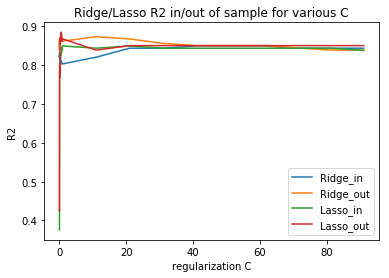

In [42]:
# for all values of C
plt.plot(estimatesRidge_df['C'],estimatesRidge_df['R2_in'], label='Ridge_in' )
plt.plot(estimatesRidge_df['C'],estimatesRidge_df['R2_out'], label='Ridge_out')
plt.plot(estimatesLasso_df['C'],estimatesLasso_df['R2_in'], label='Lasso_in' )
plt.plot(estimatesLasso_df['C'],estimatesLasso_df['R2_out'], label='Lasso_out')
plt.title('Ridge/Lasso R2 in/out of sample for various C')
plt.xlabel('regularization C')
plt.ylabel('R2')
plt.legend(loc='best')
plt.show()

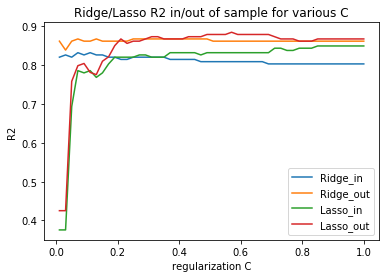

In [43]:
# for small values of C
plt.plot(estimatesRidge_df['C'].iloc[:len(smallC)+1],estimatesRidge_df['R2_in'].iloc[:len(smallC)+1], label='Ridge_in' )
plt.plot(estimatesRidge_df['C'].iloc[:len(smallC)+1],estimatesRidge_df['R2_out'].iloc[:len(smallC)+1], label='Ridge_out')
plt.plot(estimatesLasso_df['C'].iloc[:len(smallC)+1],estimatesLasso_df['R2_in'].iloc[:len(smallC)+1], label='Lasso_in' )
plt.plot(estimatesLasso_df['C'].iloc[:len(smallC)+1],estimatesLasso_df['R2_out'].iloc[:len(smallC)+1], label='Lasso_out')
plt.title('Ridge/Lasso R2 in/out of sample for various C')
plt.xlabel('regularization C')
plt.ylabel('R2')
plt.legend(loc='best')
plt.show()

For large C (i.e. small regularization constant, i.e little regularization "pressure" on the coefficients) the 
R2 ends up in the same place with the non regularized regression (as we would expect)

The interesting phenomena is for small C(large regularization constant). In this case it seems that after C=0.2 Lasso does better in sample and out of sample (the differences in terms of R2 are small however). 

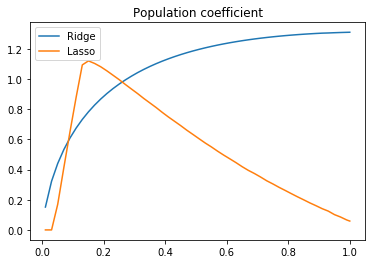

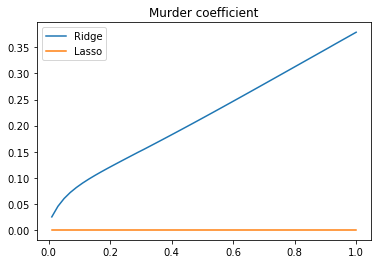

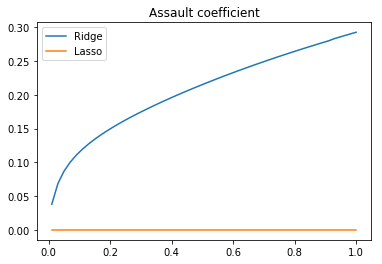

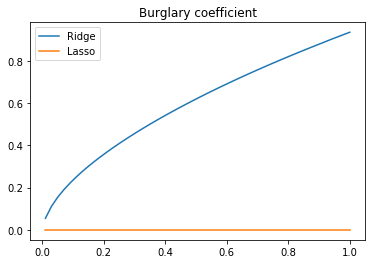

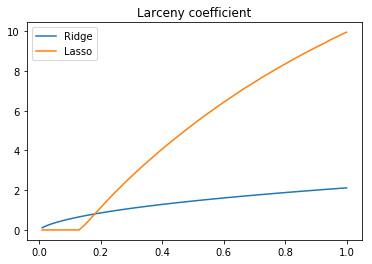

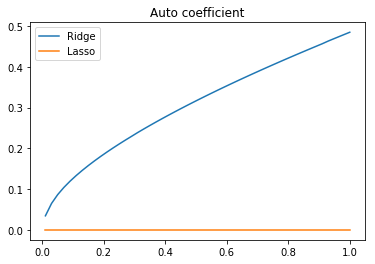

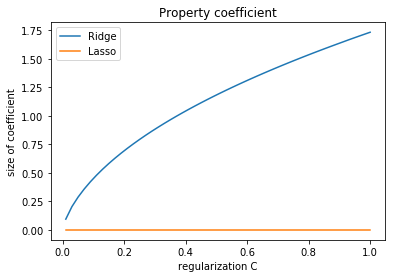

In [44]:
plotVars = X_train.columns
for ii in range(0, len(plotVars)):
    auxVar = X_train.columns[ii]
    plt.subplots(1,1)
    plt.plot(estimatesRidge_df['C'].iloc[:len(smallC)+1],estimatesRidge_df[auxVar].iloc[:len(smallC)+1], label='Ridge')
    plt.plot(estimatesLasso_df['C'].iloc[:len(smallC)+1],estimatesLasso_df[auxVar].iloc[:len(smallC)+1], label='Lasso')
    plt.title(auxVar+' coefficient')
    plt.legend(loc='best')
plt.xlabel('regularization C')
plt.ylabel('size of coefficient')
plt.show()         

One can see that the Lasso Logistic Regression considers important only the factors Population and Larceny
which is very attractive (i.e. 2 features are better than 7)

In [45]:
estimatesLasso_df

,Population,Murder,Assault,Burglary,Larceny,Auto,Property,C,R2_in,R2_out
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.01,0.375723,0.425287
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.03,0.375723,0.425287
2,0.169864,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.05,0.693642,0.758621
3,0.414080,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.07,0.786127,0.798851
4,0.651630,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.09,0.780347,0.804598
5,0.880243,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.11,0.786127,0.781609
6,1.094038,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.13,0.768786,0.775862
7,1.120559,0.000000,0.000000,0.000000,0.274652,0.000000,0.000000,0.15,0.780347,0.810345
8,1.103673,0.000000,0.000000,0.000000,0.612928,0.000000,0.000000,0.17,0.803468,0.821839
9,1.081473,0.000000,0.000000,0.000000,0.952439,0.000000,0.000000,0.19,0.820809,0.850575


All in all I like the Lasso Logistic regression best because:
    1. it has just as good R2 as the other ones
    2. it uses fewer features than either the Vanilla or the Ridge Logistic regression. 
    
